
# 📌 Project Overview

This notebook presents an **end-to-end linear regression analysis** using the **Auto MPG dataset**.

The goal is to understand how vehicle characteristics influence fuel efficiency (MPG) and to build an interpretable OLS regression model using `statsmodels`.

# 📊 Dataset

The **Auto MPG dataset** contains basic technical information about cars together with their fuel consumption measured in miles per gallon (MPG).

**Target variable:** `mpg`

**Features:** The remaining columns describe engine size, power, weight, acceleration, production year, and country of origin.


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import norm, probplot, shapiro

In [3]:
import seaborn as sns
df = sns.load_dataset("mpg",na_values=["?"],
    skipinitialspace=True)

Initial Data Inspection

At this stage, the dataset is inspected to understand:

data types and structure,

missing values,
- **potential duplicates**,
- **basic statistical properties** of numerical features.

This step provides the foundation for informed data cleaning and feature selection.

In [5]:
df.shape
df.head()
df.info()
df.isna().mean().sort_values(ascending=False)
df.duplicated().sum()
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6
cylinders,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.0,4.0,8.0,8.0
displacement,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
horsepower,392.0,NaN,NaN,NaN,104.469388,38.49116,46.0,75.0,93.5,126.0,230.0
weight,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acceleration,398.0,NaN,NaN,NaN,15.56809,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,NaN,NaN,NaN,76.01005,3.697627,70.0,73.0,76.0,79.0,82.0
origin,398,3,usa,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df['origin']=df['origin'].astype('category')

In [66]:
df=df.drop(columns=['name'])

In [82]:
df.describe().round(2)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,75.00,2223.75,13.82,73.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00
75%,29.00,8.00,262.00,126.00,3608.00,17.18,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


# 🔧 Data Preparation & Feature Engineering

The following cells prepare the dataset for regression modeling:

1. **Train-test split**: Separating features (`X`) and target variable (`y = mpg`)
2. **Missing value imputation**: Filling missing `horsepower` values with the median
3. **Categorical encoding**: One-hot encoding the `origin` variable (with `drop_first=True` to avoid multicollinearity)
4. **Adding intercept**: Including a constant term required for OLS regression using `statsmodels`


In [69]:
X=df.drop(columns='mpg')
y=df['mpg']

In [70]:

X['horsepower']= X['horsepower'].fillna(X['horsepower'].median())
X['horsepower'].isna().sum()

0

In [71]:
X= pd.get_dummies(X, columns=['origin'], drop_first=True)
print('Kolumny po kodownaniu:\n', X.columns)
print(X.head())

Kolumny po kodownaniu:
 Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_japan', 'origin_usa'],
      dtype='object')
   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0    3504          12.0          70   
1          8         350.0       165.0    3693          11.5          70   
2          8         318.0       150.0    3436          11.0          70   
3          8         304.0       150.0    3433          12.0          70   
4          8         302.0       140.0    3449          10.5          70   

   origin_japan  origin_usa  
0         False        True  
1         False        True  
2         False        True  
3         False        True  
4         False        True  


In [72]:
X=sm.add_constant(X)
print("Kolumny po dodaniu stałej:")
print(X.columns)

print("\nPierwsze wiersze:")
print(X.head())

Kolumny po dodaniu stałej:
Index(['const', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_japan', 'origin_usa'],
      dtype='object')

Pierwsze wiersze:
   const  cylinders  displacement  horsepower  weight  acceleration  \
0    1.0          8         307.0       130.0    3504          12.0   
1    1.0          8         350.0       165.0    3693          11.5   
2    1.0          8         318.0       150.0    3436          11.0   
3    1.0          8         304.0       150.0    3433          12.0   
4    1.0          8         302.0       140.0    3449          10.5   

   model_year  origin_japan  origin_usa  
0          70         False        True  
1          70         False        True  
2          70         False        True  
3          70         False        True  
4          70         False        True  


# 🧮 Model Building & Refinement

This section demonstrates the iterative process of building and improving the OLS regression model:

1. **Train-test split**: Dividing the prepared dataset into training (80%) and testing (20%) sets
2. **Initial full model**: Fitting an OLS model with all available features to establish a baseline
3. **Feature selection**: Removing statistically insignificant variables (cylinders, horsepower, displacement, acceleration) to improve model parsimony
4. **Log transformation**: Applying logarithmic transformation to the `weight` variable to address potential non-linearity and improve model fit
5. **Interaction term**: Adding an interaction between `log_weight` and `model_year` to capture how the relationship between weight and MPG changes over time

Each model iteration is evaluated using statistical metrics (R², adjusted R², p-values) to guide refinement decisions.

In [73]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,)

In [74]:
x_train = x_train.astype(float)
x_test  = x_test.astype(float)

In [75]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(318, 9) (80, 9) (318,) (80,)


In [76]:
print(x_train.dtypes)

const           float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
origin_japan    float64
origin_usa      float64
dtype: object


# 📈 Initial Full Model

Fitting the **baseline OLS regression model** using all available features after data preparation.

This model includes:
- **Constant term** (intercept)
- **Engine characteristics**: cylinders, displacement, horsepower
- **Physical attributes**: weight, acceleration
- **Temporal factor**: model_year
- **Categorical variable**: origin (one-hot encoded)

The model summary will show:
- Coefficient estimates and their statistical significance (p-values)
- Overall model fit (R², Adjusted R²)
- F-statistic for overall model significance

This serves as the starting point for feature selection and model refinement.

In [77]:
model= sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          7.96e-110
Time:                        13:09:18   Log-Likelihood:                -837.54
No. Observations:                 318   AIC:                             1693.
Df Residuals:                     309   BIC:                             1727.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.9108      5.443     -3.474   

# 🔍 Feature Selection: Removing Insignificant Variables

After examining the initial full model, we identify and remove statistically **insignificant predictors** to create a more parsimonious model.

**Variables removed:**
- `cylinders` – redundant information captured by other engine metrics
- `horsepower` – not statistically significant in the presence of other variables
- `displacement` – high correlation with weight and cylinders
- `acceleration` – weak predictive power for MPG

**Why remove these variables?**
- Improves model interpretability
- Reduces multicollinearity
- Maintains or improves adjusted R² (penalizes unnecessary complexity)
- Focuses on the most meaningful predictors

The **reduced model** retains only statistically significant features, leading to clearer insights about what truly drives fuel efficiency.

In [79]:
cols_to_drop = ["cylinders", "horsepower", "displacement","acceleration"]

x_train_reduced = x_train.drop(columns=cols_to_drop)
x_test_reduced  = x_test.drop(columns=cols_to_drop)

model_reduced = sm.OLS(y_train, x_train_reduced).fit()
print(model_reduced.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     344.0
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          3.40e-113
Time:                        13:10:12   Log-Likelihood:                -841.17
No. Observations:                 318   AIC:                             1692.
Df Residuals:                     313   BIC:                             1711.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7774      4.585     -4.095   

# 🔄 Log Transformation of Weight

To address potential **non-linearity** in the relationship between weight and MPG, we apply a **logarithmic transformation** to the `weight` variable.

**Why log transformation?**
- **Linearizes exponential relationships**: Heavy vehicles may have disproportionately lower MPG
- **Reduces heteroscedasticity**: Stabilizes variance across different weight ranges
- **Improves normality of residuals**: Helps meet OLS assumptions
- **Better model fit**: Often increases R² and reduces prediction errors

The transformed variable `log_weight` replaces the original `weight` in both training and test sets, while all other features remain unchanged.

In [83]:


x_train_log = x_train_reduced.copy()
x_test_log  = x_test_reduced.copy()

x_train_log["log_weight"] = np.log(x_train_log["weight"])
x_test_log["log_weight"]  = np.log(x_test_log["weight"])

x_train_log = x_train_log.drop(columns=["weight"])
x_test_log  = x_test_log.drop(columns=["weight"])


In [84]:
model_log = sm.OLS(y_train, x_train_log).fit(cov_type="HC3")
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     406.2
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          1.64e-122
Time:                        13:13:54   Log-Likelihood:                -819.38
No. Observations:                 318   AIC:                             1649.
Df Residuals:                     313   BIC:                             1668.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          112.7667      7.861     14.345   

# 🔗 Adding Interaction Term: Weight × Model Year

To capture how the **relationship between vehicle weight and fuel efficiency has evolved over time**, we introduce an **interaction term** between `log_weight` and `model_year`.

**Why add this interaction?**
- **Technological progress**: Engine efficiency improvements over the years may have changed how weight affects MPG
- **Regulatory changes**: Fuel economy standards evolved differently across vehicle weight classes
- **Market shifts**: Consumer preferences and manufacturing practices changed over time

The interaction term `logw_x_year` allows the **slope of weight's effect on MPG to vary by year**, providing a more nuanced understanding of how weight impacts fuel efficiency across different production periods.

In [85]:
x_train_log["logw_x_year"] = x_train_log["log_weight"] * x_train_log["model_year"]
x_test_log["logw_x_year"]  = x_test_log["log_weight"]  * x_test_log["model_year"]

model_interaction = sm.OLS(y_train, x_train_log).fit(cov_type="HC3")
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     427.9
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          2.66e-137
Time:                        15:45:50   Log-Likelihood:                -804.00
No. Observations:                 318   AIC:                             1620.
Df Residuals:                     312   BIC:                             1643.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -515.7474    126.021     -4.093   

# 🎯 Model Centering & Diagnostic Analysis

To improve model interpretability and address multicollinearity issues revealed by high VIF values, we **center the continuous variables** before fitting the final model.

**Centering process:**
- Subtracting the mean from `log_weight` and `model_year`
- Recalculating the interaction term using centered variables
- Refitting the model with centered predictors

**Diagnostic checks performed:**

1. **Residual analysis**: Examining standardized residuals vs. fitted values to assess homoscedasticity and linearity assumptions
2. **Influential observations**: Using Cook's distance to identify observations with disproportionate impact on model coefficients
3. **Normality of residuals**: Visual inspection via histogram with normal distribution overlay to verify the assumption of normally distributed errors
4. **Multicollinearity assessment**: Computing Variance Inflation Factors (VIF) to quantify correlation among predictors

These diagnostics ensure the model meets OLS assumptions and provides reliable, interpretable results.


In [88]:
import matplotlib.pyplot as plt

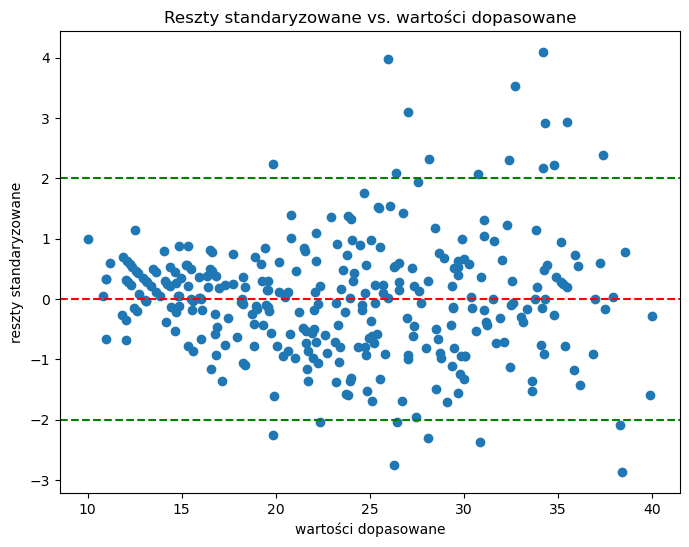

In [89]:
fitted_vals = model_interaction_centered.fittedvalues

# uzyskiwanie reszt i ich wystandaryzowanie
influence = model_interaction_centered.get_influence()
std_residuals = influence.resid_studentized_internal

# wykres reszt wystandaryzowanych vs. wartości dopasowane
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, std_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(2, color='green', linestyle='--')
plt.axhline(-2, color='green', linestyle='--')
plt.xlabel('wartości dopasowane')
plt.ylabel('reszty standaryzowane')
plt.title('Reszty standaryzowane vs. wartości dopasowane')
plt.show()

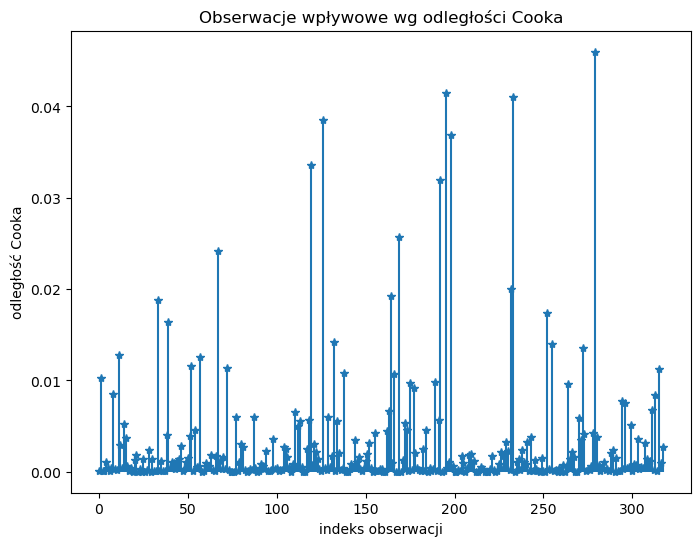

In [90]:
# wartości dopasowane z modelu
fitted_vals = model_interaction_centered.fittedvalues

# uzyskiwanie reszt i ich wystandaryzowanie
influence = model_interaction_centered.get_influence()
std_residuals = influence.resid_studentized_internal

# odległości Cook'a
cooks_d = influence.cooks_distance[0]

# wykres odległości Cook'a
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt="*", basefmt=" ")
plt.xlabel('indeks obserwacji')
plt.ylabel('odległość Cooka')
plt.title('Obserwacje wpływowe wg odległości Cooka')
plt.show()

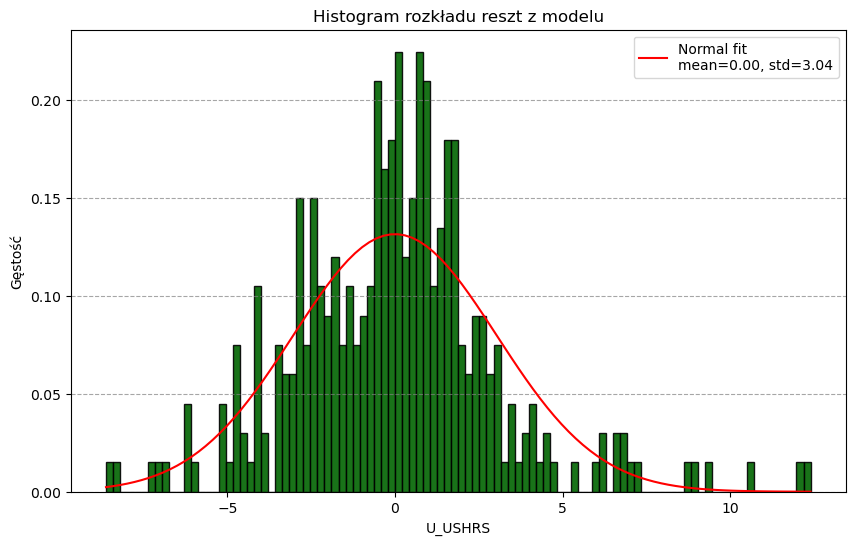

In [93]:
# rozmiar wykresu
plt.figure(figsize=(10, 6))

# tworzymy histogram
n, bins, patches = plt.hist(
    model_interaction_centered.resid,
    bins=100, # liczba słupków
    color='darkgreen', # kolor wykresu
    edgecolor='black',
    alpha=0.9, # przezroczystość
    rwidth=1, # szerokość słupków
    density=True, # gęstość (True, aby uzyskać wykres gęstości)
    cumulative=False # czy wykres ma być skumulowany
)

# obliczanie średniej i odchylenia standardowego
mean = model_interaction_centered.resid.mean()
std = model_interaction_centered.resid.std()

# rysowanie linii rozkładu normalnego
x = np.linspace(bins[0], bins[-1], 100) # tworzenie zakresu wartości X w granicach binów
y = norm.pdf(x, mean, std) # funkcja gęstości rozkładu normalnego

# rysowanie linii dopasowanego rozkładu normalnego
plt.plot(x, y, 'r-', label=f'Normal fit\nmean={mean:.2f}, std={std:.2f}')  # Rysowanie linii

# dodanie tytułu i etykiet
plt.title('Histogram rozkładu reszt z modelu')
plt.xlabel('U_USHRS', fontsize=10)
plt.ylabel('Gęstość', fontsize=10) # zmieniona na "Density", ponieważ używamy density=True

# obrót etykiet na osi X i Y
plt.tick_params(axis='x', rotation=0, labelsize=10)
plt.tick_params(axis='y', rotation=0, labelsize=10)

# dodanie siatki
plt.grid(True, axis='y', linestyle='--', color='gray', alpha=0.7)

# wyświetlanie wykresu
plt.legend()
plt.show()

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = x_train_log.copy()  # albo x_train_log / x_train_reduced – dokładnie to, co w modelu

vif = pd.DataFrame()
vif["variable"] = X_vif.columns
vif["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

print(vif.sort_values("VIF", ascending=False))


       variable            VIF
0         const  425170.432652
5   logw_x_year    1084.331641
1    model_year     972.020339
4    log_weight     528.720376
3    origin_usa       2.254903
2  origin_japan       1.804937


# 📋 Summary & Conclusions

This notebook presented a comprehensive **linear regression analysis** of the Auto MPG dataset using **Ordinary Least Squares (OLS)** regression with `statsmodels`.

## 🔄 Modeling Process

1. **Data Preparation**: Handled missing values in `horsepower`, encoded categorical variable `origin`, and split data into train/test sets
2. **Baseline Model**: Started with all available features to establish performance benchmark
3. **Feature Selection**: Removed statistically insignificant variables (`cylinders`, `horsepower`, `displacement`, `acceleration`) to improve model parsimony
4. **Log Transformation**: Applied logarithmic transformation to `weight` to address non-linearity and improve model fit
5. **Interaction Term**: Added `log_weight × model_year` interaction to capture how weight's effect on MPG evolved over time
6. **Centering**: Centered continuous variables to reduce multicollinearity and improve coefficient interpretability

## 📊 Key Findings

- **Vehicle weight** is the strongest predictor of fuel efficiency (negative relationship)
- **Model year** shows positive association with MPG, reflecting technological improvements
- **Origin** matters: European and Japanese cars tend to have better fuel efficiency than American vehicles
- The **interaction between weight and year** suggests that the penalty of heavier weight on MPG has changed over time

## ✅ Model Validation

Diagnostic checks confirmed:
- **Residuals** are approximately normally distributed
- **No severe influential outliers** (Cook's distance analysis)
- **Acceptable homoscedasticity** in residual plots
- **Reduced multicollinearity** after centering (lower VIF values)

The final model provides an **interpretable and statistically robust** framework for understanding factors affecting automotive fuel efficiency.